In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
greater_than = 11.25

In [19]:
%%time

data_address = '../Data/'
df_gal = pd.read_csv(data_address + f'massive_galaxies_10_{greater_than}.csv') 

df_gal.describe()

CPU times: user 116 ms, sys: 40 ms, total: 156 ms
Wall time: 155 ms


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,93097.000000,93097.000000,93097.000000,9.309700e+04,93097.000000,93097.000000,93097.000000,93097.000000,93097.000000
mean,325576.133087,322500.028738,320613.762863,3.993206e+11,36294.172057,49.532974,0.763965,0.349477,-0.509183
std,184863.273960,182799.587421,183249.915097,3.995129e+11,21403.382524,179.779705,351.345586,343.572230,328.125457
min,1.864417,10.164207,0.260974,1.800010e+11,0.000000,0.000000,-2896.388700,-2323.086700,-2275.444800
25%,163866.950000,166201.380000,162514.560000,2.161480e+11,15329.000000,0.000000,-219.363920,-215.157970,-201.740720
50%,332449.620000,329260.160000,319925.780000,2.784900e+11,41555.000000,0.000000,-2.822351,2.646382,-3.028148
75%,483949.000000,475466.120000,478698.410000,4.192930e+11,57237.000000,0.000000,216.770710,214.257250,200.506210
max,639996.190000,639980.940000,639993.120000,1.077460e+13,57237.000000,2471.570000,2423.330800,3048.129900,2638.449000


In [20]:
df_clusters_subset = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['UID', 'x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_subset.describe()

,UID,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,3488.193257,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,2329.428037,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,0.000000,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,1534.750000,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,3195.500000,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,5159.250000,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,11472.000000,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


In [21]:
mask = df_gal['host'].isin(df_clusters_subset['UID'])
df_gal_around_6k_clus = df_gal[mask]

df_gal_around_6k_clus.describe()



,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,11947.000000,11947.000000,11947.000000,1.194700e+04,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000
mean,327421.618628,321991.792932,321822.501186,8.967794e+11,2792.877208,278.964510,-2.413835,11.070424,0.156151
std,186870.566450,181118.722708,184444.421676,8.805010e+11,2308.609785,374.418771,469.521419,467.760582,452.353332
min,14.773047,131.310680,0.260974,1.800070e+11,0.000000,0.000000,-2896.388700,-2323.086700,-2275.444800
25%,160407.725000,165161.280000,162517.405000,2.708625e+11,844.000000,0.000000,-266.626725,-257.164750,-250.500350
50%,341843.090000,335251.590000,323177.060000,6.495100e+11,2245.000000,0.000000,-3.402748,5.654122,-5.485026
75%,486865.500000,469422.015000,481089.110000,1.208330e+12,4313.500000,487.544000,265.821960,274.575515,246.847780
max,639890.310000,639933.380000,639980.000000,1.077460e+13,11472.000000,2471.570000,2423.330800,3048.129900,2638.449000


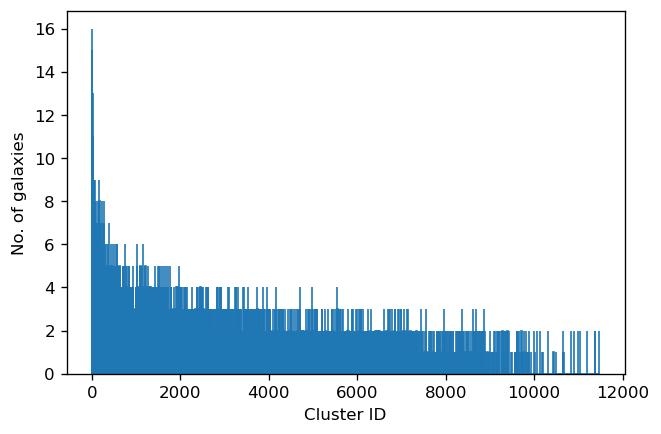

In [22]:
dpi = 120
plt.figure(dpi = dpi)
plt.hist(df_gal_around_6k_clus['host'], bins = max(df_gal_around_6k_clus['host']), 
         ec = 'C0')
# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');

In [23]:
print(df_gal_around_6k_clus.groupby('host').size().mean())

print(df_gal_around_6k_clus.groupby('host').size().sum())
print(len(df_gal_around_6k_clus))

1.9649671052631579
11947
11947


Mean no of galaxies:  1.96
Mean distance of galaxies:  278.96 kpc/h


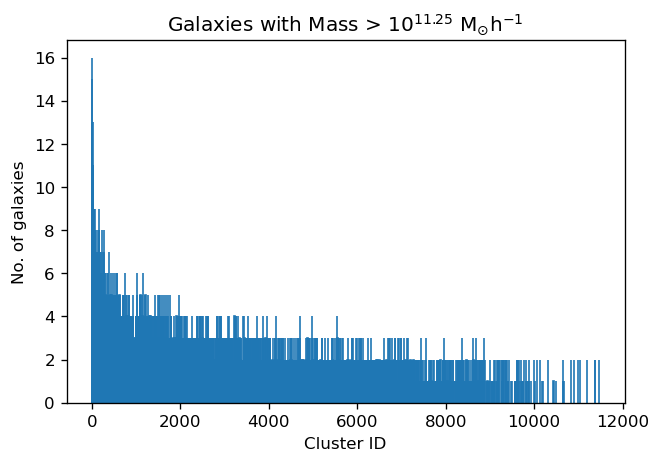

In [26]:
dpi = 120
plt.figure(dpi = dpi)

ser_gal_count = df_gal_around_6k_clus.groupby('host').size()
plt.bar(ser_gal_count.index, height = ser_gal_count,ec = 'C0');

# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');
plt.title('Galaxies with Mass > 10$^{' + f'{greater_than}' + '}$ M$_{\odot}$h$^{\mathrm{-1}}$');

print('Mean no of galaxies: ', round(df_gal_around_6k_clus.groupby('host').size().mean(), 2))
# print('Mean distance of galaxies: ', round(df_gal_around_6k_clus.groupby('dist[kpc/h]').size().mean(), 2), 'kpc/h')
print('Mean distance of galaxies: ', round(df_gal_around_6k_clus['dist[kpc/h]'].mean(), 2), 'kpc/h')